In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
iris = datasets.load_iris() #per caricare i datasets già inclusi in sklearn

In [3]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


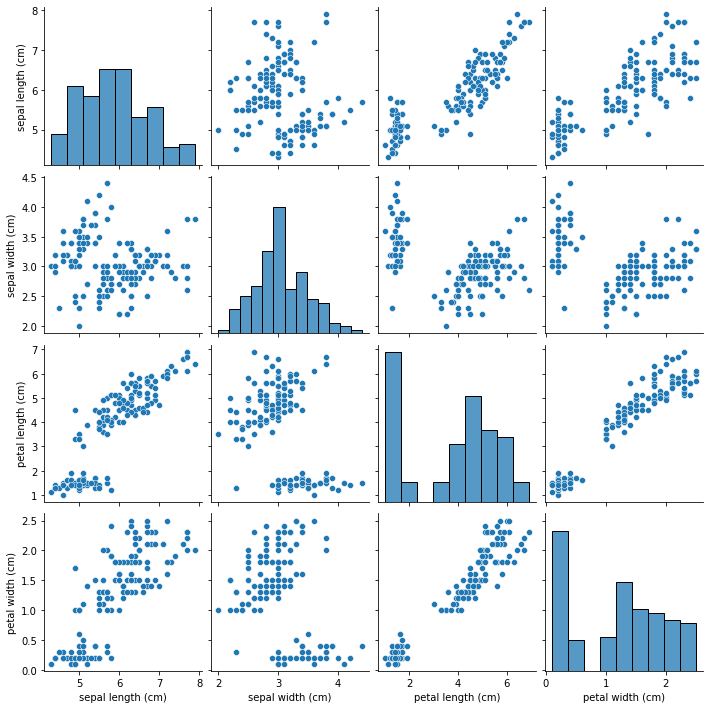

In [7]:
import seaborn as sns
sns.pairplot(df)
plt.show()

Aggiungiamo i targets

In [8]:
targets = pd.Series(iris.target, name='targets') #Facciamo una serie perché è una colonna sola

In [9]:
targets = targets.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]}) #rimpiazziamo i numeri con i nomi

In [10]:
iris.target_names #oppure
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
targets

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: targets, Length: 150, dtype: object

In [11]:
df_with_targets = df.join(targets) #faccio il join delle features con la colonna target
display(df_with_targets)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),targets
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [14]:
df_with_targets.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'targets'],
      dtype='object')

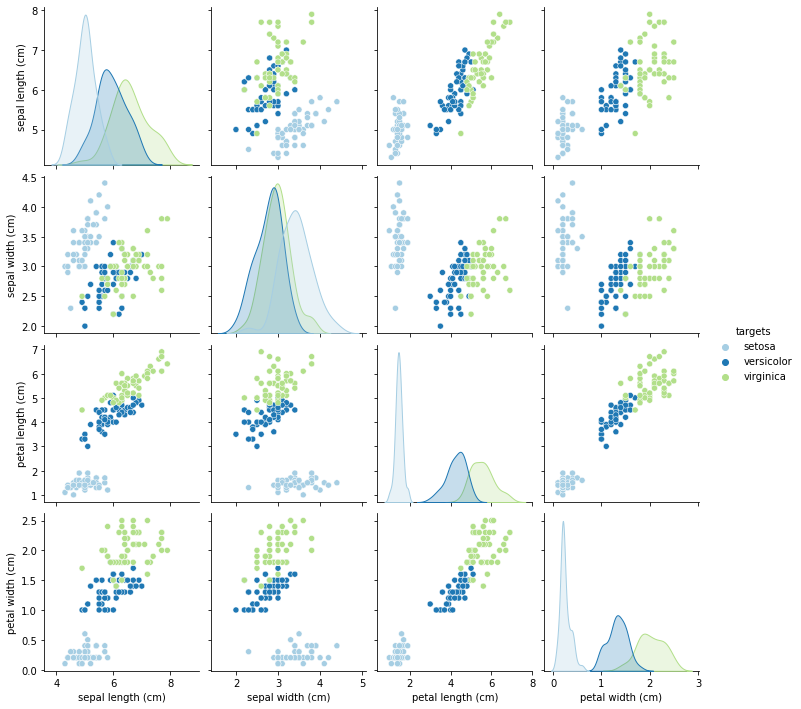

In [12]:
sns.pairplot(df_with_targets, hue='targets', palette='Paired')
plt.show()

#####K-MEANS 4 features

Il train_test_split per il clustering è un argomento discusso.
\
Non avendo un target in un certo senso non avremmo modo di valutare la bontà del modello, e quindi di valutare un possibile overfitting, quindi sembrerebbe non necessario. 
\
Allo stesso tempo di fatto ci troviamo sempre a valutare un algoritmo di clustering utilizzando metriche specifiche (come l'inerzia e il sihlouette score) valutate sul set di dati su cui abbiamo fittato il modello.
\
Quindi le scelte che facciamo sul modello (per esempio il numero di cluster) sono di fatto guidate da queste metriche, e possono essere soggette a overfitting. Una possibile soluzione è come sempre fare una crosso validation. 
\
Ad ogni modo per i nostri scopi attuali non ci preoccuperemo di questo e useremo tutto il set di dati.

In [15]:
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']].copy()

In [16]:
from sklearn.cluster import KMeans

model = KMeans(random_state=22)
model.fit(X)

KMeans(random_state=22)

In [17]:
### parametri che ha utilizzato il modello in automatico
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 22,
 'tol': 0.0001,
 'verbose': 0}

In questo caso l'algoritmo individua in automatico 8 cluster, in cui centro vengono individuati in questi punti (in questo caso abbiamo 2 features, quindi i centri saranno punti in uno spazio a 2 dimensioni):

In [18]:
### centri dei cluster
model.cluster_centers_

array([[5.37058824, 3.8       , 1.51764706, 0.27647059],
       [6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [5.8       , 2.83181818, 4.32272727, 1.34090909],
       [4.81818182, 3.23636364, 1.43333333, 0.23030303],
       [5.39230769, 2.43846154, 3.65384615, 1.12307692],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [6.03684211, 2.70526316, 5.        , 1.77894737],
       [6.63333333, 3.03333333, 4.63333333, 1.45833333]])

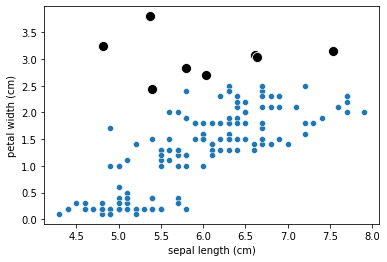

In [19]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=X)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

model.cluster_centers_[:,0]
\
[: significa prendi tutte le righe, 0 significa prendi la colonna zero]

Volendo però possiamo anche specificare il numero di cluster nell'inizializzazione del modello:
\
con n_cluster possiamo specificare il numero di parametri

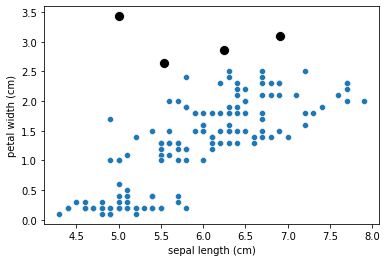

In [20]:
model = KMeans(n_clusters=4, random_state=22) 
model.fit(X)
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=X)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

Se voglio vedere a quali cluster il modello assegna ogni punto, mi basta fare farmi printare model.labels_ (NB. ovviamente non è detto che corrispondano a quelle di IRIS, in quanto qui non stiamo cercando di predire una specifica specie, ma di dividere le specie tra loro)

In [21]:
print(model.labels_) #iris è particolare perché ho i dati ordinati, all'inizio l'algoritmo ha tutti i dati appartenenti ad un solo cluster, e quindi è meglio fare uno shuffling per scambiarli di posto 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 3 1 3 3 3 3 2 3 3 3 1
 1 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 1 3 3 3 1 3 3 3 1 1
 3 1]


In [22]:
labels = pd.Series(model.labels_, index=X.index, name='labels')
labels_df = X.join(labels)
display(labels_df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,3


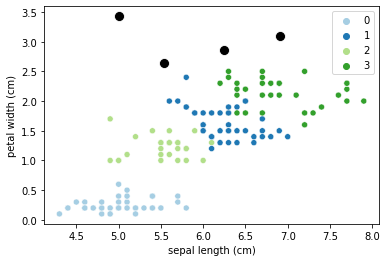

In [23]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='labels', data=labels_df, palette='Paired')
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

######METRICHE DI VALUTAZIONE

Possiamo chiederci quanto bene il nostro modello stia clusterizzando i dati. Ricordiamoci che anche se in questo in teoria caso avremmo i target (cioè sappiamo a che fiore corrisponde ogni sample), solitamente non li abbiamo a disposizione. Dobbiamo quindi usare metriche indipendenti dai target.

######INERTIA

In [24]:
### centri dei cluster
model.inertia_ #somma della distanza di ogni punto dal proprio centro e poi fa la media

57.22847321428572

L'inerzia è una misura della 'compattezza' dei vari cluster. Si calcola sulla base delle distanze di ogni dato dal centro del suo cluster. E' da tenere in mente che all'aumentare del numero di cluster l'inertia diminuirà sempre. In generale infatti in un insieme con 2 cluster le distanze dei punti dai centri sarà più alta di come sarebbe se dividessimo l'insime con 20 cluster, in quanto i punti sarebbero mediamente più vicini ai propri centri. Si tratta qui di trovare un compromesso tra numero di cluster e inertia. In generale si usa il metodo 'elbow' (gomito), per cui si plotta l'inertia per ogni numero di cluster, e si sceglie quello in cui la linea di inerzia si piega, cominciando a scendere in modo più lento (intuitivamente significa che la compatezza dei cluster non aumenterebbe in modo significativo aumentando ancora il numero di cluster)

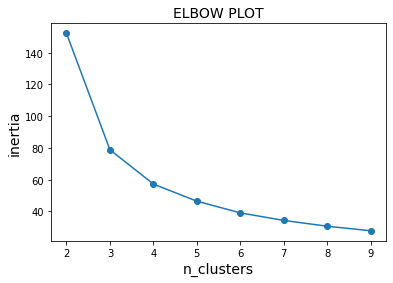

In [25]:
inertia_list = list()
for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(X)
    inertia_list += [model.inertia_]

plt.scatter(range(2, 10), inertia_list)
plt.plot(range(2, 10), inertia_list)
plt.title('ELBOW PLOT', fontsize=14)
plt.xlabel('n_clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.show()


In realta esiste una libreria molto molto comoda per valutare i modelli di clustering, e generare plot tipici come l'Elbow plot: yellobrick. Il visualizer di yellobrick funziona come un vero e proprio modello, quindi bisogna dargli un range per il parametro k e fittarlo sui dati

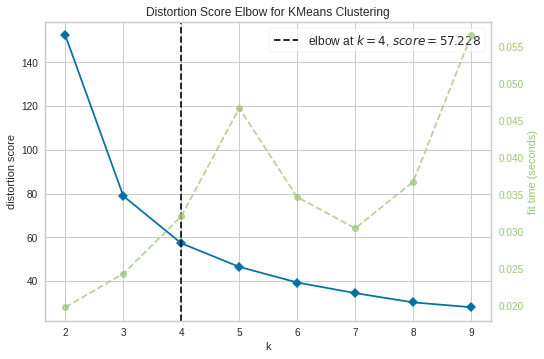

In [26]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In questo caso individua l'elbow a k=4. Noi sappiamo già che il k giusto sarebbe 3, in quanto sappiamo che i tipi di fiori sono 3

###### SILHOUETTE SCORE

Il Silhoutte Score va da -1 a 1, dove:
1 significa che abbiamo cluster ben divisi e coerenti

*   1 significa che abbiamo cluster ben divisi e coerenti
*   0 significa che i cluster non sono ben distinguibili tra loro
*   -1 significa che abbiamo probabilmente delle mis-classificazioni

Quando il silhouette score è minore di zero è misclassified!

A differenza dell'inerzia (che usa la distanza dai centri dei cluster), è calcolato utilizzando sia la distanza **intra-cluster** (cioè la distanza di un sample dagli altri samples dello stesso cluster), sia la distanza **inter-cluster** (cioè la distanza di un sample dai cluster cui non appartiene). Quindi ci dà un informazione diversa dall'inerzia, che tiene conto anche delle relazioni tra i diversi cluster.

In [27]:
from sklearn.metrics import silhouette_score

for n in range(2,7):

    model = KMeans(n_clusters=n)
    model.fit(X)
    labels = model.labels_
    print('Avg Sihlouette Score (k={}): {} '.format(n,silhouette_score(X, labels)))


Avg Sihlouette Score (k=2): 0.6810461692117465 
Avg Sihlouette Score (k=3): 0.5528190123564102 
Avg Sihlouette Score (k=4): 0.49805050499728815 
Avg Sihlouette Score (k=5): 0.48874888709310654 
Avg Sihlouette Score (k=6): 0.36784649847122536 


Si può generare un grafico del Silhouette Score (sempre con yellowbrick), dove ogni cluster è identificato da un colore, e la forma della figura che lo rappresenta sono gli score calcolati per ogni punto del cluster, e ordinati in modo crescente (sull'asse x ho proprio il valore degli Score). La linea tratteggiata è la media di tutti i Sihlouette Score di ogni sample ( che poi è il vero e proprio sihloutte_score sintetico che fornisce anche sklearn)


Avg Sihlouette Score:  0.6810461692117465


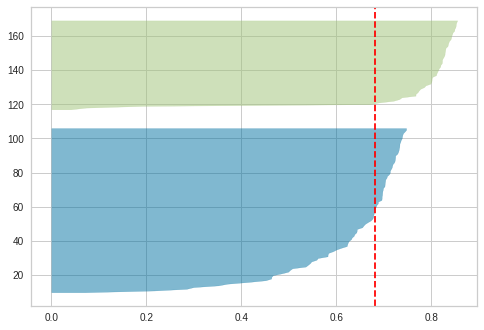


Avg Sihlouette Score:  0.5528190123564102


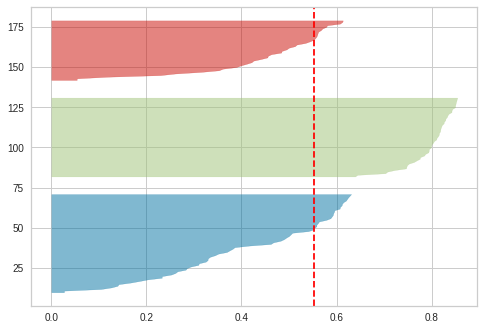


Avg Sihlouette Score:  0.49805050499728815


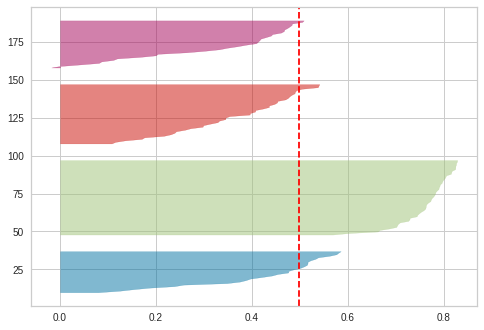


Avg Sihlouette Score:  0.48874888709310654


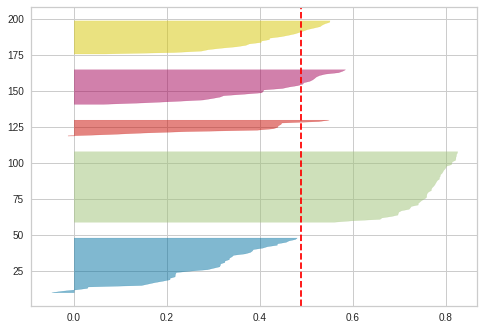


Avg Sihlouette Score:  0.36483400396700366


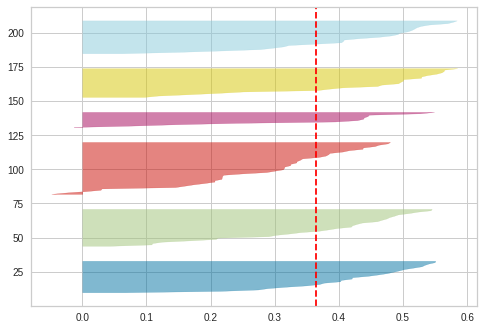

In [28]:
from yellowbrick.cluster import SilhouetteVisualizer

for n in range(2,7):

    model = KMeans(n_clusters=n)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()

    


Per valutare quale numero di cluster scegliere, questi plot ci possono dare qualche indicazione. 
\
**Sono da scartare quei k per i quali** :
*   c'è qualche cluster interamente sotto la linea di media
*   i cluster sono popolati molto diversamente
*   le forme dei cluster sono molto diverse
*   ci sono molti score negativi

In [29]:
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_
labels = pd.Series(labels, name='labels')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


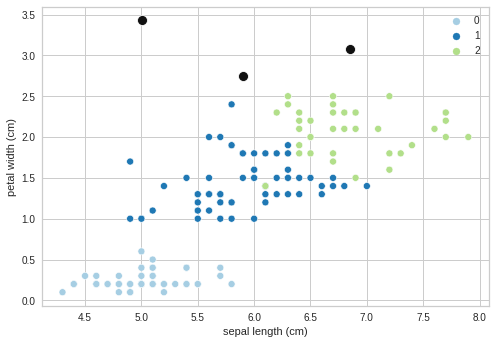

In [30]:
labels_df = X.join(labels)
display(labels_df)

sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='labels', data=labels_df, palette='Paired') #o fai più scatter, o fai il pairplot 
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()



######CLASSIFICATION METRICS (solo se abbiamo i target, cioè mai nella realtà)

Per confronto con classi vere:

In [ ]:
y = pd.Series(iris.target, index=X.index, name='targets')
target_df = X.join(y)

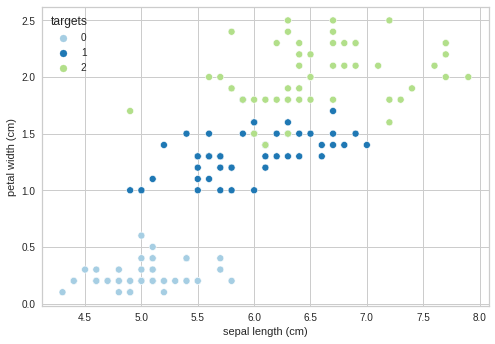

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='targets', data=target_df, palette='Paired')
plt.show()

In [ ]:
labels = model.labels_
labels = pd.Series(labels, name='labels')

In [ ]:
y = y.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]}) #Dovresti cercare il replace del numero dei target al nome del num del cluster
labels = labels.replace({0:iris.target_names[1], 1:iris.target_names[0], 2:iris.target_names[2]})

AttributeError: ignored

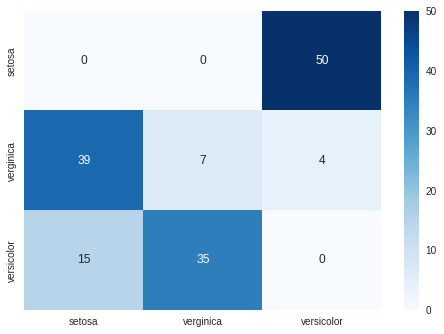

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, labels)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".0f", cmap='Blues');

#####K-MEANS 2 features

Il train_test_split per il clustering è un argomento discusso.
\
Non avendo un target in un certo senso non avremmo modo di valutare la bontà del modello, e quindi di valutare un possibile overfitting, quindi sembrerebbe non necessario. 
\
Allo stesso tempo di fatto ci troviamo sempre a valutare un algoritmo di clustering utilizzando metriche specifiche (come l'inerzia e il sihlouette score) valutate sul set di dati su cui abbiamo fittato il modello.
\
Quindi le scelte che facciamo sul modello (per esempio il numero di cluster) sono di fatto guidate da queste metriche, e possono essere soggette a overfitting. Una possibile soluzione è come sempre fare una crosso validation. 
\
Ad ogni modo per i nostri scopi attuali non ci preoccuperemo di questo e useremo tutto il set di dati.

In [ ]:
X = df[['sepal length (cm)', 'petal width (cm)']].copy()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(random_state=22)
model.fit(X)

KMeans(random_state=22)

In [ ]:
### parametri che ha utilizzato il modello in automatico
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 22,
 'tol': 0.0001,
 'verbose': 0}

In questo caso l'algoritmo individua in automatico 8 cluster, in cui centro vengono individuati in questi punti (in questo caso abbiamo 2 features, quindi i centri saranno punti in uno spazio a 2 dimensioni):

In [ ]:
### centri dei cluster
model.cluster_centers_

array([[5.01666667, 1.2       ],
       [5.97777778, 1.8       ],
       [7.475     , 2.05      ],
       [5.64      , 1.22      ],
       [6.585     , 2.205     ],
       [4.67      , 0.195     ],
       [5.23      , 0.28      ],
       [6.42916667, 1.45416667]])

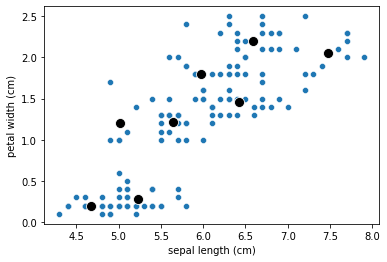

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=X)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

model.cluster_centers_[:,0]
\
[: significa prendi tutte le righe, 0 significa prendi la colonna zero]

Volendo però possiamo anche specificare il numero di cluster nell'inizializzazione del modello:
\
con n_cluster possiamo specificare il numero di parametri

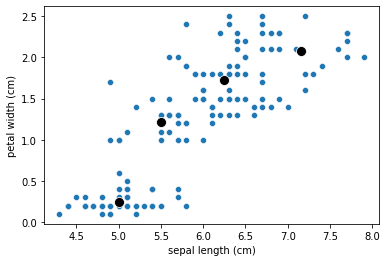

In [ ]:
model = KMeans(n_clusters=4, random_state=22) 
model.fit(X)
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=X)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

Se voglio vedere a quali cluster il modello assegna ogni punto, mi basta fare farmi printare model.labels_ (NB. ovviamente non è detto che corrispondano a quelle di IRIS, in quanto qui non stiamo cercando di predire una specifica specie, ma di dividere le specie tra loro)

In [ ]:
print(model.labels_) #iris è particolare perché ho i dati ordinati, all'inizio l'algoritmo ha tutti i dati appartenenti ad un solo cluster, e quindi è meglio fare uno shuffling per scambiarli di posto 

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 0 2 2 0 1 0 2 0 2
 2 0 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 0 0 2 0 0 0 2 2
 2 2]


In [ ]:
labels = pd.Series(model.labels_, index=X.index, name='labels')
labels_df = X.join(labels)
display(labels_df)

,sepal length (cm),petal width (cm),labels
0,5.1,0.2,3
1,4.9,0.2,3
2,4.7,0.2,3
3,4.6,0.2,3
4,5.0,0.2,3
...,...,...,...
145,6.7,2.3,0
146,6.3,1.9,2
147,6.5,2.0,2
148,6.2,2.3,2


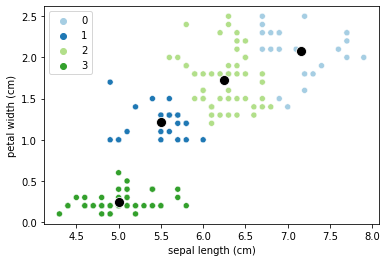

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='labels', data=labels_df, palette='Paired')
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

######METRICHE DI VALUTAZIONE

Possiamo chiederci quanto bene il nostro modello stia clusterizzando i dati. Ricordiamoci che anche se in questo in teoria caso avremmo i target (cioè sappiamo a che fiore corrisponde ogni sample), solitamente non li abbiamo a disposizione. Dobbiamo quindi usare metriche indipendenti dai target.

######INERTIA

In [ ]:
### centri dei cluster
model.inertia_ #somma della distanza di ogni punto dal proprio centro e poi fa la media

24.69231507639845

L'inerzia è una misura della 'compattezza' dei vari cluster. Si calcola sulla base delle distanze di ogni dato dal centro del suo cluster. E' da tenere in mente che all'aumentare del numero di cluster l'inertia diminuirà sempre. In generale infatti in un insieme con 2 cluster le distanze dei punti dai centri sarà più alta di come sarebbe se dividessimo l'insime con 20 cluster, in quanto i punti sarebbero mediamente più vicini ai propri centri. Si tratta qui di trovare un compromesso tra numero di cluster e inertia. In generale si usa il metodo 'elbow' (gomito), per cui si plotta l'inertia per ogni numero di cluster, e si sceglie quello in cui la linea di inerzia si piega, cominciando a scendere in modo più lento (intuitivamente significa che la compatezza dei cluster non aumenterebbe in modo significativo aumentando ancora il numero di cluster)

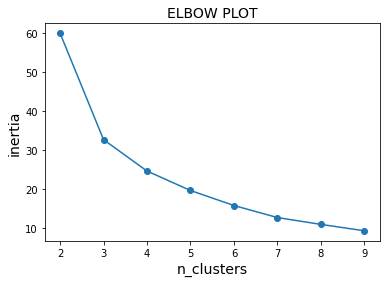

In [ ]:
inertia_list = list()
for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(X)
    inertia_list += [model.inertia_]

plt.scatter(range(2, 10), inertia_list)
plt.plot(range(2, 10), inertia_list)
plt.title('ELBOW PLOT', fontsize=14)
plt.xlabel('n_clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.show()


In realta esiste una libreria molto molto comoda per valutare i modelli di clustering, e generare plot tipici come l'Elbow plot: yellobrick. Il visualizer di yellobrick funziona come un vero e proprio modello, quindi bisogna dargli un range per il parametro k e fittarlo sui dati

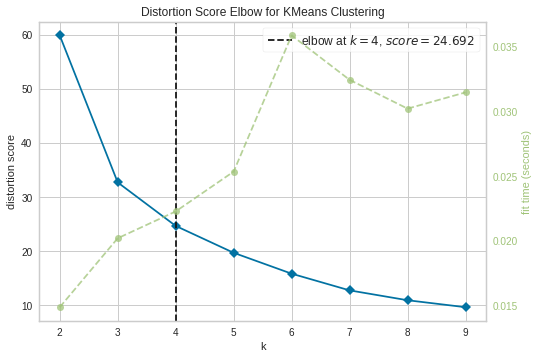

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In questo caso individua l'elbow a k=4. Noi sappiamo già che il k giusto sarebbe 3, in quanto sappiamo che i tipi di fiori sono 3

###### SILHOUETTE SCORE

Il Silhoutte Score va da -1 a 1, dove:
1 significa che abbiamo cluster ben divisi e coerenti

*   1 significa che abbiamo cluster ben divisi e coerenti
*   0 significa che i cluster non sono ben distinguibili tra loro
*   -1 significa che abbiamo probabilmente delle mis-classificazioni

Quando il silhouette score è minore di zero è misclassified!

A differenza dell'inerzia (che usa la distanza dai centri dei cluster), è calcolato utilizzando sia la distanza **intra-cluster** (cioè la distanza di un sample dagli altri samples dello stesso cluster), sia la distanza **inter-cluster** (cioè la distanza di un sample dai cluster cui non appartiene). Quindi ci dà un informazione diversa dall'inerzia, che tiene conto anche delle relazioni tra i diversi cluster.

In [ ]:
from sklearn.metrics import silhouette_score

for n in range(2,7):

    model = KMeans(n_clusters=n)
    model.fit(X)
    labels = model.labels_
    print('Avg Sihlouette Score (k={}): {} '.format(n,silhouette_score(X, labels)))


Avg Sihlouette Score (k=2): 0.5645716498947053 
Avg Sihlouette Score (k=3): 0.5052738291206261 
Avg Sihlouette Score (k=4): 0.4634141452435154 
Avg Sihlouette Score (k=5): 0.47194733868606115 
Avg Sihlouette Score (k=6): 0.42372079782745486 


Si può generare un grafico del Silhouette Score (sempre con yellowbrick), dove ogni cluster è identificato da un colore, e la forma della figura che lo rappresenta sono gli score calcolati per ogni punto del cluster, e ordinati in modo crescente (sull'asse x ho proprio il valore degli Score). La linea tratteggiata è la media di tutti i Sihlouette Score di ogni sample ( che poi è il vero e proprio sihloutte_score sintetico che fornisce anche sklearn)


Avg Sihlouette Score:  0.5645716498947053


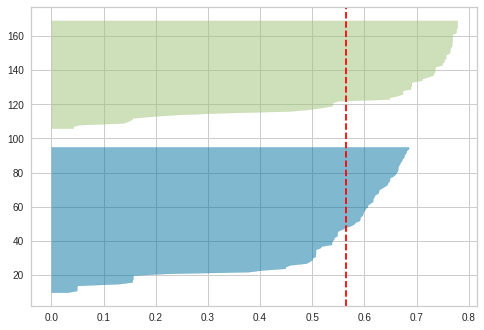


Avg Sihlouette Score:  0.5039558227584355


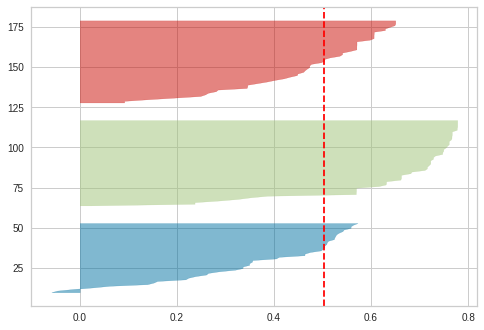


Avg Sihlouette Score:  0.4634141452435154


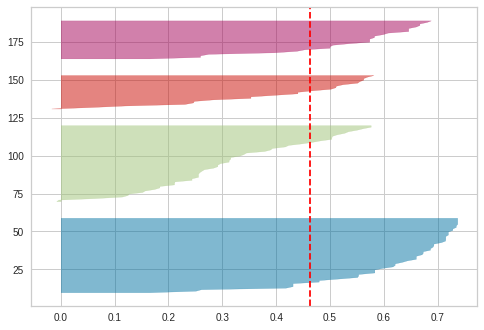


Avg Sihlouette Score:  0.47391474154300983


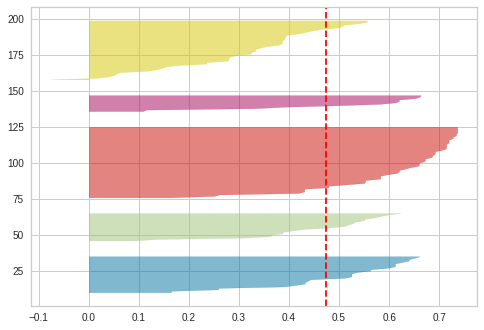


Avg Sihlouette Score:  0.42240232998321353


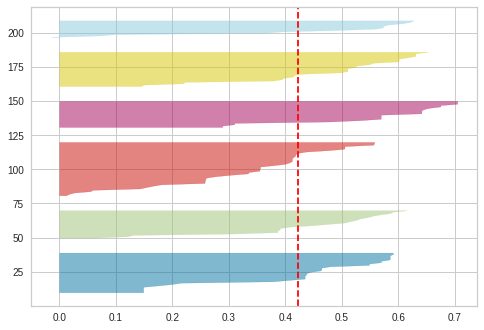

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

for n in range(2,7):

    model = KMeans(n_clusters=n)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()

    


Per valutare quale numero di cluster scegliere, questi plot ci possono dare qualche indicazione. 
\
**Sono da scartare quei k per i quali** :
*   c'è qualche cluster interamente sotto la linea di media
*   i cluster sono popolati molto diversamente
*   le forme dei cluster sono molto diverse
*   ci sono molti score negativi

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_
labels = pd.Series(labels, name='labels')

,sepal length (cm),petal width (cm),labels
0,5.1,0.2,2
1,4.9,0.2,2
2,4.7,0.2,2
3,4.6,0.2,2
4,5.0,0.2,2
...,...,...,...
145,6.7,2.3,0
146,6.3,1.9,0
147,6.5,2.0,0
148,6.2,2.3,0


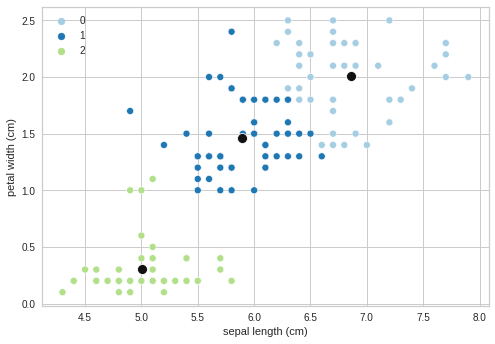

In [ ]:
labels_df = X.join(labels)
display(labels_df)

sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='labels', data=labels_df, palette='Paired')
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

######CLASSIFICATION METRICS (solo se abbiamo i target, cioè mai nella realtà)

Per confronto con classi vere:

In [ ]:
y = pd.Series(iris.target, index=X.index, name='targets')
target_df = X.join(y)

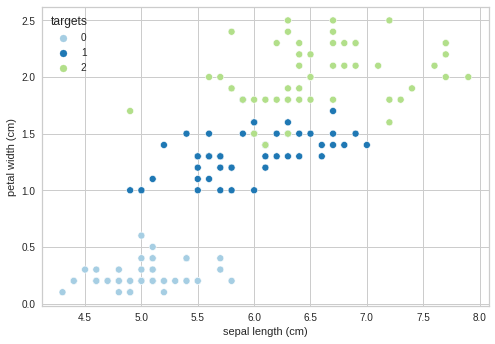

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='targets', data=target_df, palette='Paired')
plt.show()

In [ ]:
labels = model.labels_
labels = pd.Series(labels, name='labels')

In [ ]:
y = y.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]}) #Dovresti cercare il replace del numero dei target al nome del num del cluster
labels = labels.replace({0:iris.target_names[1], 1:iris.target_names[0], 2:iris.target_names[2]})

AttributeError: ignored

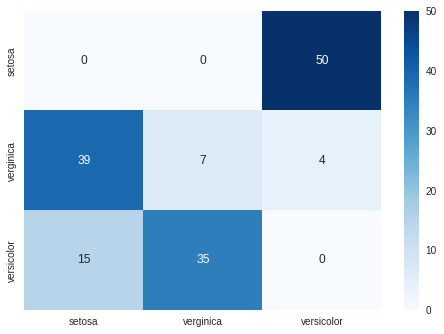

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, labels)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".0f", cmap='Blues');